**Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.

Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1
Explanation:The link list looks like
1 -> 2 -> 3 -> 4
^              |
|______________|
A loop is present.
If you remove it successfully,
the answer will be 1.


In [1]:
class Node:
 
    # Constructor to initialize the node object
    def __init__(self, data):
        self.data = data
        self.next = None
 
class LinkedList:
 
    # Function to initialize head
    def __init__(self):
        self.head = None
 
    def detectAndRemoveLoop(self):
        slow_p = fast_p = self.head
         
        while(slow_p and fast_p and fast_p.next):
            slow_p = slow_p.next
            fast_p = fast_p.next.next
 
            # If slow_p and fast_p meet at some point then
            # there is a loop
            if slow_p == fast_p:
                self.removeLoop(slow_p)
         
                # Return 1 to indicate that loop is found
                return 1
         
        # Return 0 to indicate that there is no loop
        return 0
 
    # Function to remove loop
    # loop_node --> pointer to one of the loop nodes
    # head --> Pointer to the start node of the linked list
    def removeLoop(self, loop_node):
        ptr1 = loop_node
        ptr2 = loop_node
         
        # Count the number of nodes in loop
        k = 1
        while(ptr1.next != ptr2):
            ptr1 = ptr1.next
            k += 1
 
        # Fix one pointer to head
        ptr1 = self.head
         
        # And the other pointer to k nodes after head
        ptr2 = self.head
        for i in range(k):
            ptr2 = ptr2.next
 
        # Move both pointers at the same place
        # they will meet at loop starting node
        while(ptr2 != ptr1):
            ptr1 = ptr1.next
            ptr2 = ptr2.next
 
        # Get pointer to the last node
        while(ptr2.next != ptr1):
            ptr2 = ptr2.next
 
        # Set the next node of the loop ending node
        # to fix the loop
        ptr2.next = None
 
    # Function to insert a new node at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node
 
    # Utility function to print the LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print(temp.data, end = ' ')
            temp = temp.next
 
 
# Driver program
llist = LinkedList()
llist.push(10)
llist.push(4)
llist.push(15)
llist.push(20)
llist.push(50)
 
# Create a loop for testing
llist.head.next.next.next.next.next = llist.head.next.next
 
llist.detectAndRemoveLoop()
 
print("Linked List after removing loop")
llist.printList()

Linked List after removing loop
50 20 15 4 10 

**Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

Input:
LinkedList: 4->5->6
Output:457

Input:
LinkedList: 1->2->3
Output:124

In [2]:
import sys
import math
 
# Linked list node
 
 
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
 
# Function to create a new node with given data */
 
 
def newNode(data):
    return Node(data)
 
# Function to reverse the linked list */
 
 
def reverseList(head):
    if not head:
        return
    curNode = head
    prevNode = head
    nextNode = head.next
    curNode.next = None
 
    while(nextNode):
        curNode = nextNode
        nextNode = nextNode.next
        curNode.next = prevNode
        prevNode = curNode
 
    return curNode
 
# Adds one to a linked lists and return the head
# node of resultant list
 
 
def addOne(head):
 
    # Reverse linked list and add one to head
    head = reverseList(head)
    k = head
    carry = 0
    prev = None
    head.data += 1
 
    # update carry for next calculation
    while(head != None) and (head.data > 9 or carry > 0):
        prev = head
        head.data += carry
        carry = head.data // 10
        head.data = head.data % 10
        head = head.next
 
    if carry > 0:
        prev.next = Node(carry)
    # Reverse the modified list
    return reverseList(k)
 
# A utility function to print a linked list
 
 
def printList(head):
    if not head:
        return
    while(head):
        print("{}".format(head.data), end="")
        head = head.next
 
 
# Driver code
if __name__ == '__main__':
    head = newNode(1)
    head.next = newNode(9)
    head.next.next = newNode(9)
    head.next.next.next = newNode(9)
 
    print("List is: ", end="")
    printList(head)
 
    head = addOne(head)
 
    print("\nResultant list is: ", end="")
    printList(head)


# tc = O(n)
# sc = O(1)

List is: 1999
Resultant list is: 2000

**Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

**Example 1:**
Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)

In [3]:
from heapq import heappush, heappop
class Node:
    def __init__(self, d):
        self.data = d
        self.right = self.down = None
 
 
class LinkedList():
    def __init__(self):
 
        # head of list
        self.head = None
 
    # Utility function to insert a node at beginning of the
    #   linked list
    def push(self, head_ref, data):
 
        # 1 & 2: Allocate the Node &
        # Put in the data
        new_node = Node(data)
 
        # Make next of new Node as head
        new_node.down = head_ref
 
        # 4. Move the head to point to new Node
        head_ref = new_node
 
        # 5. return to link it back
        return head_ref
 
    def printList(self):
 
        temp = self.head
        while(temp != None):
            print(temp.data, end=" ")
            temp = temp.down
 
        print()
 
 
# class to compare two node objects
class Cmp:
    def __init__(self, node):
        self.node = node
 
    def __lt__(self, other):
        return self.node.data < other.node.data
 
 
def flatten(root):
    pq = []
    # push main linked list nodes to priority queue
    while root:
        heappush(pq, Cmp(root))
        root = root.right
    dummy = Node(0)
    temp = dummy
     
    # keep popping out the min node until there are no nodes left in priority queue
    while pq:
        node = heappop(pq).node
        temp.down = node
        temp = node
        # if bottom child exist add it to priority queue
        if node.down:
            heappush(pq, Cmp(node.down))
 
    return dummy.down
 
 
if __name__ == '__main__':
    L = LinkedList()
 
    '''
    Let us create the following linked list
            5 -> 10 -> 19 -> 28
            |    |     |     |
            V    V     V     V
            7    20    22    35
            |          |     |
            V          V     V
            8          50    40
            |                |
            V                V
            30               45
    '''
    L.head = L.push(L.head, 30)
    L.head = L.push(L.head, 8)
    L.head = L.push(L.head, 7)
    L.head = L.push(L.head, 5)
 
    L.head.right = L.push(L.head.right, 20)
    L.head.right = L.push(L.head.right, 10)
 
    L.head.right.right = L.push(L.head.right.right, 50)
    L.head.right.right = L.push(L.head.right.right, 22)
    L.head.right.right = L.push(L.head.right.right, 19)
 
    L.head.right.right.right = L.push(L.head.right.right.right, 45)
    L.head.right.right.right = L.push(L.head.right.right.right, 40)
    L.head.right.right.right = L.push(L.head.right.right.right, 35)
    L.head.right.right.right = L.push(L.head.right.right.right, 20)
 
flatten(L.head)
L.printList()

# tc = O(N * M * log(N))
# sc = O(n)

5 7 8 10 19 20 20 22 30 35 40 45 50 


**Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

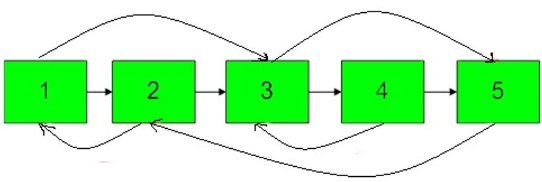

Note :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1**

Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

**Example 1**

Input:
N = 4, M = 2
value[] = {1,3,5,9}
pairs[] = {{1,1},{3,4}}
Output:1
Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.

In [4]:
class Node:  
    def __init__(self, data): 
          
        # Node Data 
        self.data = data  
          
        # Node Next 
        self.next = None 
          
        # Node Random 
        self.random = None 
  
# Dictionary 
class MyDictionary(dict):  
  
    # __init__ function 
    def __init__(self): 
          
        super().__init__() 
        self = dict() 
  
        # Function to add key:value 
    def add(self, key, value): 
          
        # Adding Values to dictionary 
        self[key] = value  
  
# Linked list class  
class LinkedList: 
      
    # Linked list constructor 
    def __init__(self, node): 
        self.head = node 
  
    # Method to print the list. 
    def __repr__(self): 
          
        temp = self.head 
        while temp is not None: 
            random = temp.random 
            random_data = (random.data if 
                           random is not None else -1) 
                             
            data = temp.data 
            print( 
                f"Data-{data}, Random data: {random_data}") 
            temp = temp.next
              
        return "\n"
  
    # push method to put data always at the head 
    # in the linked list. 
    def push(self, data): 
          
        node = Node(data) 
        node.next = self.head 
        self.head = node 
  
    # Actual clone method which returns head 
    # reference of cloned linked list. 
    def clone(self): 
          
        # Initialize two references, one  
        # with original list's head. 
        original = self.head 
        clone = None
  
        # Initialize two references, one  
        # with original list's head. 
        mp = MyDictionary() 
  
        # Traverse the original list and  
        # make a copy of that 
        # in the clone linked list 
        while original is not None: 
            clone = Node(original.data) 
            mp.add(original, clone) 
            original = original.next
  
        # Adjusting the original  
        # list reference again. 
        original = self.head 
  
        # Traversal of original list again 
        # to adjust the next and random  
        # references of clone list using hash map. 
        while original is not None: 
            clone = mp.get(original) 
            clone.next = mp.get(original.next) 
            clone.random = mp.get(original.random) 
            original = original.next
              
        # Return the head reference of the clone list. 
        return LinkedList(self.head) 
  
# Driver code 
  
# Pushing data in the linked list. 
l = LinkedList(Node(5)) 
l.push(4) 
l.push(3) 
l.push(2) 
l.push(1) 
  
# Setting up random references. 
l.head.random = l.head.next.next
l.head.next.random = l.head.next.next.next
l.head.next.next.random = l.head.next.next.next.next
l.head.next.next.next.random = (l.head.next.next.next. 
                                  next.next) 
l.head.next.next.next.next.random = l.head.next
  
# Making a clone of the  
# original linked list. 
clone = l.clone() 
  
# Print the original and cloned 
# linked list.s 
print("Original linked list") 
print(l) 
print("Cloned linked list") 
print(clone)

Original linked list
Data-1, Random data: 3
Data-2, Random data: 4
Data-3, Random data: 5
Data-4, Random data: -1
Data-5, Random data: 2


Cloned linked list
Data-1, Random data: 3
Data-2, Random data: 4
Data-3, Random data: 5
Data-4, Random data: -1
Data-5, Random data: 2




**Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

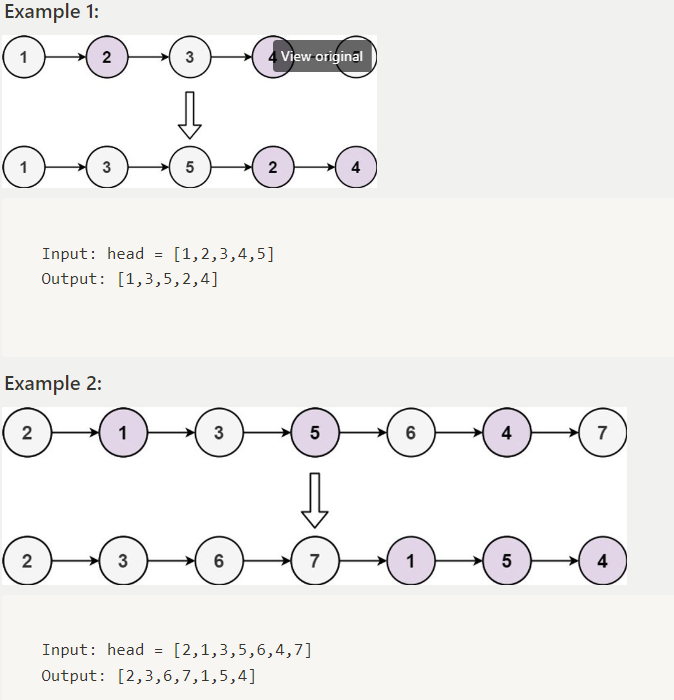



In [5]:
# Linked List Node
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
 
class LinkedList:
    def __init__(self):
        self.head = None
 
    # A utility function to create
    # a new node
    def newNode(self, key):
        temp = Node(key)
        self.next = None
        return temp
 
    # Function to rearrane the Linked List
    def rearrangeEvenOdd(self, head):
        # Corner case
        if (self.head == None or self.head.next == None):
            return None
 
        temp = self.head
        oddStart = None
        oddEnd = None
        evenStart = None
        evenEnd = None
 
        i = 1
 
        while (temp is not None):
            if(i % 2 == 0):
              # even
              if evenStart is None :
                  evenStart = temp
              else:
                  evenEnd.next = temp
              evenEnd = temp
            else:
              #odd
              if oddStart is None :
                  oddStart = temp
              else:
                  oddEnd.next = temp
              oddEnd = temp
            temp = temp.next
            i = i+1
 
        oddEnd.next = evenStart
        evenEnd.next = None
        return oddStart
 
    # A utility function to print a linked list
    def printlist(self, node):
        while (node != None):
            print(node.data, end="")
            print("->", end="")
            node = node.next
        print("NULL")
 
    # Function to insert a new node
    # at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node
 
# Driver code
ll = LinkedList()
ll.push(6)
ll.push(5)
ll.push(4)
ll.push(3)
ll.push(2)
ll.push(1)
print("Given Linked List")
ll.printlist(ll.head)
 
start = ll.rearrangeEvenOdd(ll.head)
 
print("\nModified Linked List")
ll.printlist(start)

Given Linked List
1->2->3->4->5->6->NULL

Modified Linked List
1->3->5->2->4->6->NULL


**Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

**Example 2**

Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4


In [7]:
class Node:
  
    # Constructor to initialize the node object
    def __init__(self, data):
        self.data = data
        self.next = None
  
  
class LinkedList:
  
    # Function to initialize head
    def __init__(self):
        self.head = None
  
    # Function to insert a new node at the beginning
    def push(self, new_data):
        # allocate node and put the data
        new_node = Node(new_data)
  
        # Make next of new node as head
        new_node.next = self.head
  
        # move the head to point to the new Node
        self.head = new_node
  
    # Utility function to print it the linked LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print(temp.data, end=" ")
            temp = temp.next
  
    # This function rotates a linked list counter-clockwise and
    # updates the head. The function assumes that k is smaller
    # than size of linked list. It doesn't modify the list if
    # k is greater than of equal to size
    def rotate(self, k):
        if k == 0:
            return
  
        # Let us understand the below code for example k = 4
        # and list = 10->20->30->40->50->60
        current = self.head
  
        # current will either point to kth or NULL after
        # this loop
        # current will point to node 40 in the above example
        count = 1
        while(count < k and current is not None):
            current = current.next
            count += 1
  
        # If current is None, k is greater than or equal
        # to count of nodes in linked list. Don't change
        # the list in this case
        if current is None:
            return
  
        # current points to kth node. Store it in a variable
        # kth node points to node 40 in the above example
        kthNode = current
  
        # current will point to last node after this loop
        # current will point to node 60 in above example
        while(current.next is not None):
            current = current.next
  
        # Change next of last node to previous head
        # Next of 60 is now changed to node 10
        current.next = self.head
  
        # Change head to (k + 1)th node
        # head is not changed to node 50
        self.head = kthNode.next
  
        # change next of kth node to NULL
        # next of 40 is not NULL
        kthNode.next = None
  
  
# Driver program to test above function
llist = LinkedList()
  
# Create a list 10->20->30->40->50->60
for i in range(60, 0, -10):
    llist.push(i)
  
print("Given linked list")
llist.printList()
llist.rotate(4)
  
print("\nRotated Linked list")
llist.printList()

Given linked list
10 20 30 40 50 60 
Rotated Linked list
50 60 10 20 30 40 

**Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

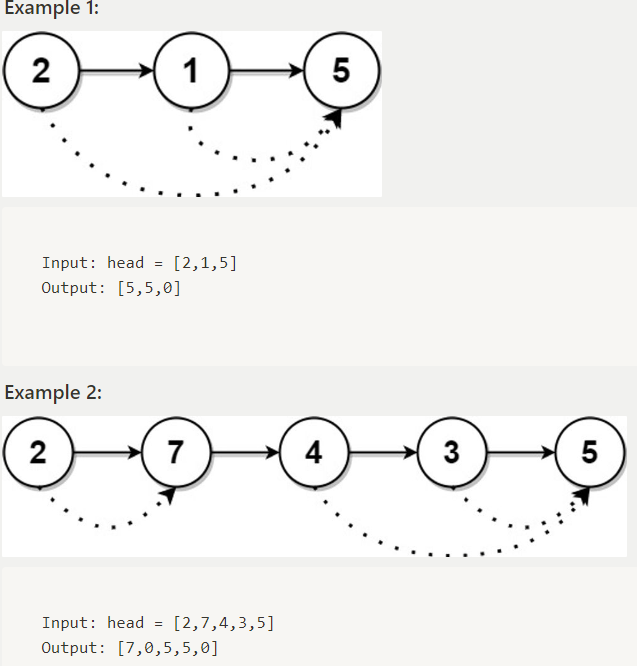


In [8]:
# List Node
class ListNode:
 
    def __init__(self, x):
 
        self.val = x
        self.next = None
  
# Function to reverse the LL
def rev(head):
  
    pre = None
    curr = head
    nex = curr.next
  
    # Till current is not None
    while (curr):
        curr.next = pre
        pre = curr
        curr = nex
        nex = (curr.next) if curr else None
     
    head = pre
    return head
  
# Function to print a LL node
def printList(head):
 
    while(head):
        print(str(head.val), end = ' ')
        head = head.next
      
# Function to find the next greater
# element in the list
def nextLargerLL(head):
 
    if (head == None):
        return None
  
    # Dummy Node
    res = ListNode(-1)
    temp = res
  
    # Reverse the LL
    head = rev(head)
    st = []
  
    while (head):
  
        # Initial Condition
        if (len(st) == 0):
            temp.next = ListNode(0)
            st.append(head.val)
         
        else:
  
            # Maintain Monotonicity
            # Decreasing stack of element
            while (len(st) != 0 and st[-1]<= head.val):
                st.pop()
  
            # Update result LL
            if (len(st) == 0):
                temp.next = ListNode(0)
                st.append(head.val)
             
            else:
                temp.next = ListNode(st[-1])
                st.append(head.val)
             
        head = head.next
        temp = temp.next
  
    # Delete Dummy Node
    temp = res
    res = res.next
    del temp
  
    # Reverse result LL
    res = rev(res)
    return res
  
# Driver Code
if __name__=='__main__':
     
    # Given Linked List
    head = ListNode(2)
    curr = head
  
    curr.next = ListNode(1)
    curr = curr.next
  
    curr.next = ListNode(3)
    curr = curr.next
  
    curr.next = ListNode(0)
    curr = curr.next
  
    curr.next = ListNode(5)
    curr = curr.next
  
    # Function Call
    printList(nextLargerLL(head))

# tc =O(N)
# sc = O(N)

3 3 5 5 0 

**Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

**Example 1:**

Input: head = [1,2,3,-3,4]
Output: [1,2,4]

**Example 1:**

Input: head = [1,2,3,-3,-2]
Output: [1]

In [14]:

class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
 
# Function to create Node
def getNode(data):
    temp = ListNode(data)
    temp.next = None
    return temp
 
# Function to print the Linked List
def printList(head):
    while (head.next):
        print(head.val, end=' -> ')
        head = head.next
    print(head.val, end='')
 
# Function that removes continuous nodes
# whose sum is K
def removeZeroSum(head, K):
 
    # Root node initialise to 0
    root = ListNode(0)
 
    # Append at the front of the given
    # Linked List
    root.next = head
 
    # Map to store the sum and reference
    # of the Node
    umap = dict()
 
    umap[0] = root
 
    # To store the sum while traversing
    sum = 0
 
    # Traversing the Linked List
    while (head != None):
 
        # Find sum
        sum += head.val
 
        # If found value with (sum - K)
        if ((sum - K) in umap):
 
            prev = umap[sum - K]
            start = prev
 
            # Delete all the node
            # traverse till current node
            aux = sum
 
            # Update sum
            sum = sum - K
 
            # Traverse till current head
            while (prev != head):
                prev = prev.next
                aux += prev.val
                if (prev != head):
                    umap.remove(aux)
 
            # Update the start value to
            # the next value of current head
            start.next = head.next
 
        # If (sum - K) value not found
        else:
            umap[sum] = head
 
        head = head.next
 
    # Return the value of updated
    # head node
    return root.next
 
 
# Driver Code
if __name__ == '__main__':
 
    # Create Linked List
    head = getNode(1)
    head.next = getNode(2)
    head.next.next = getNode(-3)
    head.next.next.next = getNode(3)
    head.next.next.next.next = getNode(1)
 
    # Given sum K
    K = 5

 
    # Function call to get head node
    # of the updated Linked List
    head = removeZeroSum(head, K)
 
    # Print the updated Linked List
    if(head != None):
        printList(head)

# tc =O(N)
# sc = O(N)

1 -> 2 -> -3 -> 3 -> 1